In [1]:
setwd("~/IBM_Attrition_DataChallenge/") # sets proper working directory

In [2]:
# import R libraries to use later
suppressPackageStartupMessages(library('caret'))
suppressPackageStartupMessages(library('mlbench'))
suppressPackageStartupMessages(library(plyr))

# Read in Cleaned Data

In [3]:
df <- read.csv(file='attrition_model_data_cleaned.csv') 
head(df)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,⋯,JobRole_Research.Director,JobRole_Research.Scientist,JobRole_Sales.Executive,JobRole_Sales.Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,Attrition
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,60,696,7,4,2,52,4,4,5220,10893,⋯,0,0,1,0,1,0,0,0,1,No
2,23,650,9,1,2,37,3,1,2500,4344,⋯,0,0,0,0,0,1,0,1,0,No
3,34,829,15,3,2,71,3,1,17007,11929,⋯,1,0,0,0,1,0,0,1,0,No
4,42,622,2,4,3,81,3,4,4089,5718,⋯,0,0,0,0,0,1,0,1,0,No
5,36,1480,3,2,4,30,3,2,2088,15062,⋯,0,0,0,0,0,0,1,1,0,No
6,38,653,29,5,4,50,3,4,2406,5456,⋯,0,0,0,0,0,0,1,1,0,No


# Splitting the Data

We will use the Machine Learning package H2O in R to develop numerous ML models to compare against each other and find the best solution. Remember that anything less than 83 percent is not good.

In [4]:
# initialize and import supporting packages for h2o
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(h2o))
h2o.init(nthreads = -1)

 Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         13 hours 45 minutes 
    H2O cluster timezone:       America/Los_Angeles 
    H2O data parsing timezone:  UTC 
    H2O cluster version:        3.30.1.2 
    H2O cluster version age:    8 days  
    H2O cluster name:           H2O_from_python_naveenmirapuri_9i7lvx 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   3.18 GB 
    H2O cluster total cores:    4 
    H2O cluster allowed cores:  4 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    H2O Internal Security:      FALSE 
    H2O API Extensions:         Amazon S3, XGBoost, Algos, AutoML, Core V3, TargetEncoder, Core V4 
    R Version:                  R version 4.0.2 (2020-06-22) 



In [5]:
# we will have to convert our df to an h2o-compatible frame
dfH2O <- as.h2o(df)
dfH2O['Attrition'] = as.factor(dfH2O['Attrition'])

  |======================================================================| 100%


In [6]:
dim(dfH2O)   # returns the dimensions of the dataframe to get a better idea before modeling

[1] 3081   52

We will now have to split our H2O frame into a train, cross-validation, and testing set, each of which will be used to evaluate our model. We will use 60% for training, 20% for validation, and 20% for testing, chosen at random

In [7]:
split <- h2o.splitFrame(dfH2O, ratios = c(0.6,0.2), seed = 1234)
train <- split[[1]]
valid <- split[[2]]
test <- split[[3]]

For our model, we will set our response variable (what we are trying to predict) to Attrition, and our predictors to all of our df columns EXCEPT attrition, as we don't want to use attrition to predict attrition.

In [8]:
response <- "Attrition"
predictors <- setdiff(names(df), response)
predictors # displays all of the variables we will use to predict attrition

[1] "Age"                               "DailyRate"                        
 [3] "DistanceFromHome"                  "Education"                        
 [5] "EnvironmentSatisfaction"           "HourlyRate"                       
 [7] "JobInvolvement"                    "JobSatisfaction"                  
 [9] "MonthlyIncome"                     "MonthlyRate"                      
[11] "NumCompaniesWorked"                "PerformanceRating"                
[13] "RelationshipSatisfaction"          "StockOptionLevel"                 
[15] "TrainingTimesLastYear"             "WorkLifeBalance"                  
[17] "YearsInCurrentRole"                "YearsSinceLastPromotion"          
[19] "YearsWithCurrManager"              "JobLevel"                         
[21] "PercentSalaryHike"                 "TotalWorkingYears"                
[23] "YearsAtCompany"                    "BusinessTravel_Non.Travel"        
[25] "BusinessTravel_Travel_Frequently"  "BusinessTravel_Travel_Rarely"     
[27] "Department_Human.Resources"        "Department_Research...Development"
[29] "Department_Sales"                  "EducationField_Human.Resources"   
[31] "EducationField_Life.Sciences"      "EducationField_Marketing"         
[33] "EducationField_Medical"            "EducationField_Other"             
[35] "EducationField_Technical.Degree"   "Gender_Female"                    
[37] "Gender_Male"                       "JobRole_Healthcare.Representative"
[39] "JobRole_Human.Resources"           "JobRole_Laboratory.Technician"    
[41] "JobRole_Manager"                   "JobRole_Manufacturing.Director"   
[43] "JobRole_Research.Director"         "JobRole_Research.Scientist"       
[45] "JobRole_Sales.Executive"           "JobRole_Sales.Representative"     
[47] "MaritalStatus_Divorced"            "MaritalStatus_Married"            
[49] "MaritalStatus_Single"              "OverTime_No"                      
[51] "OverTime_Yes"

# Building the Five Models
### 1. Logistic Regression with Random Hyperparameter Search
### 2. Random Forest with Random Hyperparameter Search
### 3. Gradient Boosting Machine with Random Hyperparameter Search
### 4. Neural Network with Random Hyperparameter Search
### 5. Ensemble Model

# Logistic Regression with Random Hyperparameter Search

First, we will start with the Logistic Regression with Random Hyperparameter Search. Hyperparameters are all the different variables (iterations, batches, max run time, etc.) that can significantly change the performance of the model. In this model we have two hyperparams to control all of these variables. Thus, we will search for the best combination in a grid, then extract the best results for logistic regression with the best hyperparameters.

In [9]:
hyper_params <- list(alpha = seq(from = 0, to = 1, by = 0.001),
                    lambda = seq(from = 0, to = 1, by = 0.000001)
                    )

In [10]:
search_criteria <- list(strategy = "RandomDiscrete",
                        max_runtime_secs = 10*3600,
                        max_models = 100,
                        stopping_metric = "AUC", 
                        stopping_tolerance = 0.00001, 
                        stopping_rounds = 5, 
                        seed = 1234
                        )

In [11]:
# We will ignore warnings to increase readibility
suppressWarnings(models_glm <- h2o.grid(algorithm = "glm", grid_id = "grd_glm", x = predictors, y = response, 
                       training_frame = train, validation_frame = valid, 
                       nfolds = 0, family = "binomial", hyper_params = hyper_params, 
                       search_criteria = search_criteria, stopping_metric = "AUC", 
                       stopping_tolerance = 1e-5, stopping_rounds = 5, max_iterations = 1000,
                       seed = 1234))


  |======================================================================| 100%


We have a grid of model results, now it is time to select the best one and find its accuracy

In [12]:
models_glm_sort <- h2o.getGrid(grid_id = "grd_glm", sort_by = "auc", decreasing = TRUE)
models_glm_best <- h2o.getModel(models_glm_sort@model_ids[[1]])

In [13]:
# Gets the auc metric for the best model
models_glm_best@model$validation_metrics@metrics$AUC

[1] 0.88641

## Logistic Regression AUC: 88.64%

We can also now also plot the performance of our model using h2o!

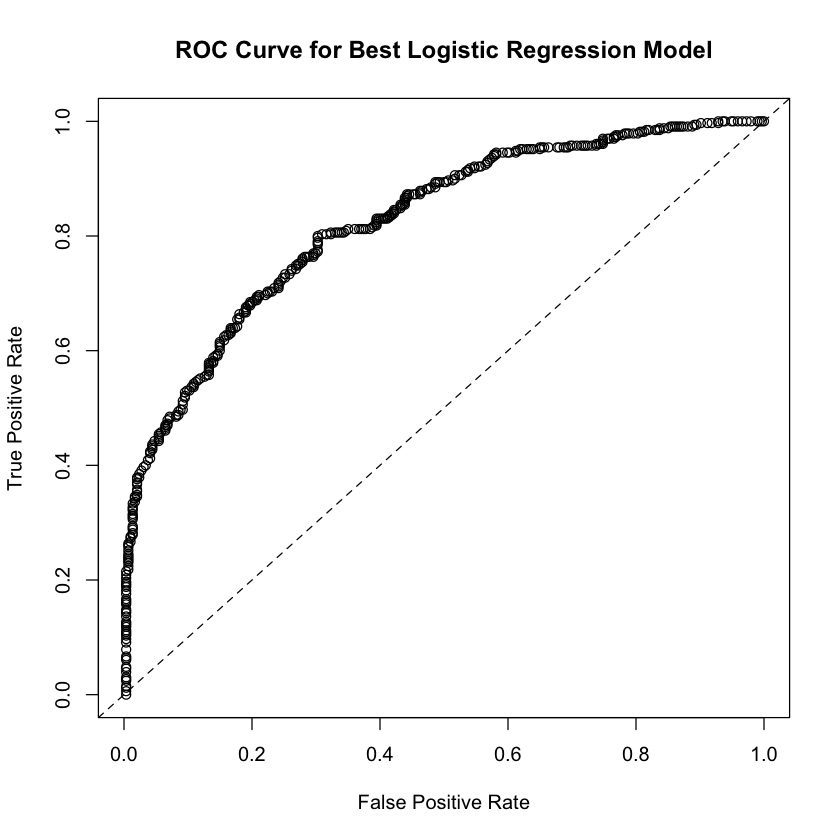

In [14]:
perf_glm_best <- h2o.performance(models_glm_best, valid)
plot(perf_glm_best, type="roc", main="ROC Curve for Best Logistic Regression Model")

We can also find which variables were the most important for this model!

In [15]:
#Variable importance
head(h2o.varimp(models_glm_best),10)

,variable,relative_importance,scaled_importance,percentage
,<chr>,<dbl>,<dbl>,<dbl>
1,EnvironmentSatisfaction,0.4814844,1.0000000,0.04386678
2,YearsAtCompany,0.4757767,0.9881457,0.04334677
3,YearsSinceLastPromotion,0.4678138,0.9716075,0.04262129
4,BusinessTravel_Non-Travel,0.4631393,0.9618989,0.04219540
5,OverTime_Yes,0.4400190,0.9138802,0.04008898
6,OverTime_No,0.4400190,0.9138802,0.04008898
7,YearsWithCurrManager,0.4247510,0.8821700,0.03869795
8,JobRole_Laboratory Technician,0.4150535,0.8620291,0.03781444
9,YearsInCurrentRole,0.4005622,0.8319319,0.03649417


## Logistic Regression Important Variables
#### 1. Environment Satisfaction
#### 2. Years At Company
#### 3. Years Since Last Promotion
#### 4. Business Travel
#### 5. Overtime